Sanity checking the CIC Emu to make sure nothing went wrong there. 

In [1]:
from pearce.emulator import NashvilleHot
from GPy.kern import *
import numpy as np
from os import path

In [2]:
import matplotlib
#matplotlib.use('Agg')
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [3]:
training_file = '/scratch/users/swmclau2/cic_zheng07/PearceCICCosmo.hdf5'

In [4]:
em_method = 'gp'

In [5]:
fixed_params = {'z':0.0}

In [12]:
hyperparams = {'kernel': (Linear(input_dim=7, ARD=True) + RBF(input_dim=7, ARD=True)+Bias(input_dim=7),
                            RBF(input_dim=5, ARD=True)+Bias(input_dim=5) ), \
               'optimize': True}

In [22]:
emu = NashvilleHot(training_file, hyperparams=hyperparams,fixed_params = fixed_params, downsample_factor = 0.3)

0 ***************
Optimization restart 1/3, f = -65492.3447442
Optimization restart 2/3, f = 1.2895555102e+15
Optimization restart 3/3, f = -65500.0397792
1 ***************
Optimization restart 1/3, f = -65246.5731629
Optimization restart 2/3, f = 1.30098654916e+13
Optimization restart 3/3, f = -65249.8116575
2 ***************
Optimization restart 1/3, f = -63428.4856915
Optimization restart 2/3, f = -63430.7659842
Optimization restart 3/3, f = -63427.2855671
3 ***************
Optimization restart 1/3, f = -60108.7037151
Optimization restart 2/3, f = -60108.4708361
Optimization restart 3/3, f = -60095.8181995
4 ***************
Optimization restart 1/3, f = -56055.7536144
Optimization restart 2/3, f = -56046.7637468
Optimization restart 3/3, f = -56048.1796159
5 ***************
Optimization restart 1/3, f = -51628.5269586
Optimization restart 2/3, f = -51628.5516999
Optimization restart 3/3, f = -51628.5362798
6 ***************
Optimization restart 1/3, f = -46825.3252384
Optimization r

In [23]:
def random_parameter_point(emu):
    params = {}
    
    for p in emu.get_param_names():
        low, high = emu.get_param_bounds(p)
        params[p] = (high-low)*np.random.rand() + low
        
    return params

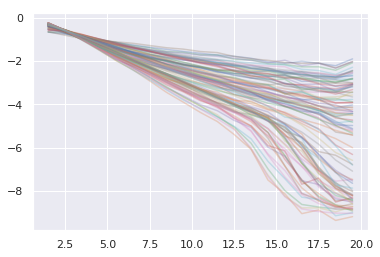

In [25]:
for i in xrange(100):
    params = random_parameter_point(emu)

    plt.plot(emu.scale_bin_centers, emu.emulate_wrt_r(params).squeeze(), alpha = 0.3)
    
plt.show()